## Years worth of traffic data - clustering

In [2]:

# Common imports
import numpy as np
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
#import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

In [3]:
# Import data
traffic = pd.read_excel('all_traffic.xlsx') #pd.read_excel('jisc_traffic_known_org.xlsx')
carbon = pd.read_excel('page_carbon.xlsx')


In [3]:
traffic.head(),carbon.head()

(              Page  Pageviews
 0       /index.php     395124
 1        /digifest      30275
 2           /about      39954
 3            /jobs      39394
 4  /online-surveys      32066,
    Unnamed: 0                                               page  carbon
 0         195                       https://www.jisc.ac.uk/about    0.73
 1         583         https://www.jisc.ac.uk/about/certification    0.71
 2        1090             https://www.jisc.ac.uk/about/corporate    0.70
 3        1196  https://www.jisc.ac.uk/about/corporate/annual-...    6.82
 4         260       https://www.jisc.ac.uk/about/corporate/board    0.90)

In [4]:
traffic['page'] = 'https://www.jisc.ac.uk' + traffic['Page']

In [5]:
traffic_gr = traffic.groupby(['page'],as_index=False).sum()
traffic_gr

,page,Pageviews
0,https://www.jisc.ac.uk/0,4
1,https://www.jisc.ac.uk/20210104111356uo_/https...,3
2,https://www.jisc.ac.uk/20210104111927uo_/https...,2
3,https://www.jisc.ac.uk/20210104112001uo_/https...,1
4,https://www.jisc.ac.uk/20210104125715uo_/https...,4
...,...,...
100438,https://www.jisc.ac.uk/yorkshire-and-humber-he...,6
100439,https://www.jisc.ac.uk/z1iiq/83107,1
100440,https://www.jisc.ac.uk/zandra-rhodes-digital-s...,2
100441,https://www.jisc.ac.uk/zetoc,550


In [6]:
len(traffic_gr), len(carbon)

(100443, 2956)

In [23]:
carbon[carbon['carbon'].isnull()]

,Unnamed: 0,page,carbon


In [7]:
result = pd.merge(carbon, traffic_gr, on="page") # merging traffic and carbon data

In [8]:
result

,Unnamed: 0,page,carbon,Pageviews
0,195,https://www.jisc.ac.uk/about,0.73,39954
1,583,https://www.jisc.ac.uk/about/certification,0.71,1928
2,1090,https://www.jisc.ac.uk/about/corporate,0.70,5150
3,1196,https://www.jisc.ac.uk/about/corporate/annual-...,6.82,2108
4,260,https://www.jisc.ac.uk/about/corporate/board,0.90,3393
...,...,...,...,...
2864,80,https://www.jisc.ac.uk/website/privacy-notice,0.68,25825
2865,812,https://www.jisc.ac.uk/welcome-to-jisc,1.78,192
2866,2190,https://www.jisc.ac.uk/workforce-explorer,0.70,95
2867,2684,https://www.jisc.ac.uk/workforce-explorer/user...,2.24,86


In [9]:
result.describe()

,Unnamed: 0,carbon,Pageviews
count,2869.000000,2869.000000,2869.000000
mean,1530.337400,0.902816,893.008017
std,923.298437,0.722565,7737.992195
min,0.000000,0.050000,0.000000
25%,770.000000,0.660000,26.000000
50%,1487.000000,0.730000,167.000000
75%,2226.000000,0.880000,511.000000
max,3549.000000,13.640000,395124.000000


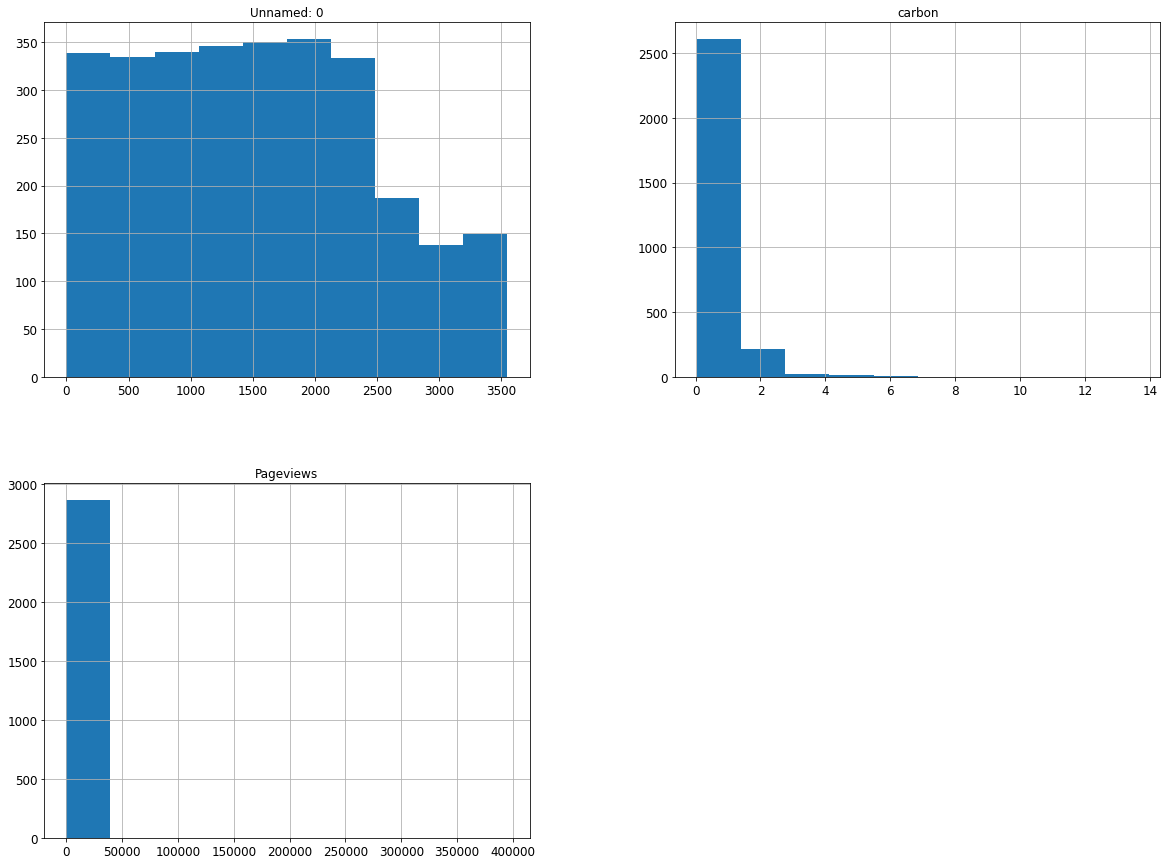

In [10]:
import matplotlib.pyplot as plt
result.hist(bins=10, figsize=(20,15))
plt.show()

In [12]:
result.drop(['Unnamed: 0'],axis = 1)

,page,carbon,Pageviews
0,https://www.jisc.ac.uk/about,0.73,39954
1,https://www.jisc.ac.uk/about/certification,0.71,1928
2,https://www.jisc.ac.uk/about/corporate,0.70,5150
3,https://www.jisc.ac.uk/about/corporate/annual-...,6.82,2108
4,https://www.jisc.ac.uk/about/corporate/board,0.90,3393
...,...,...,...
2864,https://www.jisc.ac.uk/website/privacy-notice,0.68,25825
2865,https://www.jisc.ac.uk/welcome-to-jisc,1.78,192
2866,https://www.jisc.ac.uk/workforce-explorer,0.70,95
2867,https://www.jisc.ac.uk/workforce-explorer/user...,2.24,86


In [13]:
result['tot_carbon']= result['carbon']*result['Pageviews'] # calculating total carbon and storing it in dataframe

<AxesSubplot:xlabel='Pageviews'>

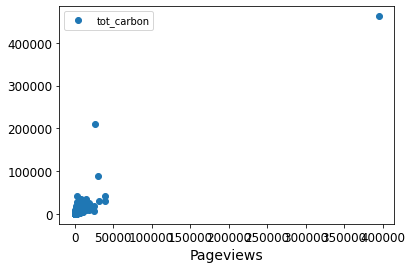

In [14]:
result.plot(x='Pageviews', y='tot_carbon', style='o')

<AxesSubplot:xlabel='carbon'>

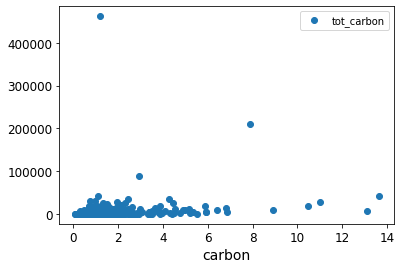

In [15]:
result.plot(x='carbon', y='tot_carbon', style='o')

In [16]:
result.to_excel(excel_writer ='traffic2_and_carbon.xlsx', sheet_name='sheet1')

In [4]:
result = pd.read_excel('traffic2_and_carbon.xlsx')


In [5]:
#checking outliers
#1.76g is the average co2 per visit. 
result[result['tot_carbon']>70000]

,Unnamed: 0,Unnamed: 0.1,page,carbon,Pageviews,tot_carbon
255,255,114,https://www.jisc.ac.uk/digifest,2.94,30275,89008.50
309,309,623,https://www.jisc.ac.uk/events/digifest-08-mar-...,7.88,26653,210025.64
1379,1379,36,https://www.jisc.ac.uk/index.php,1.17,395124,462295.08


In [20]:
reduced = result.drop([255])
reduced = reduced.drop([309])
reduced = reduced.drop([1379])

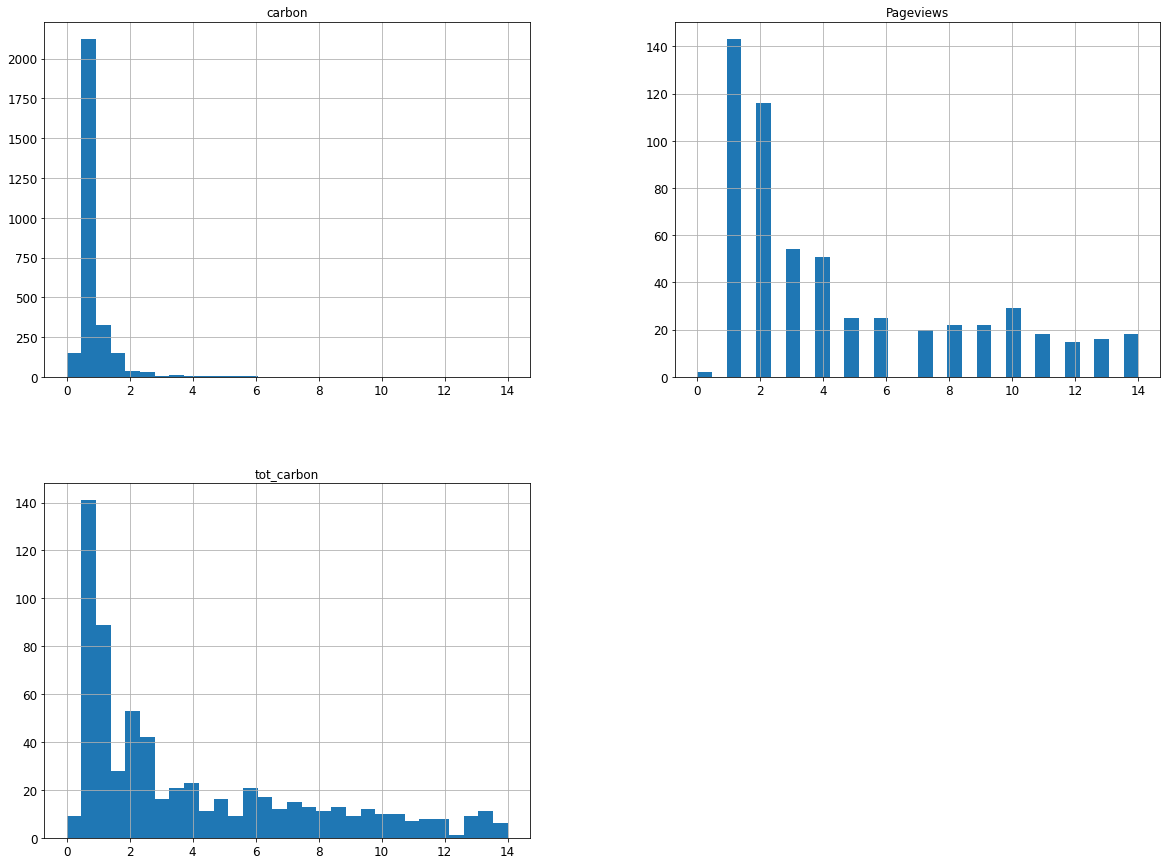

In [21]:
import matplotlib.pyplot as plt
result.iloc[: , -3:].hist(bins=30, range=(0,14), figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='Pageviews'>

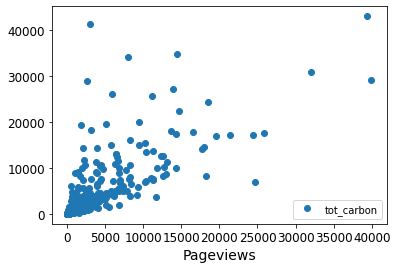

In [22]:
 reduced.plot(x='Pageviews', y='tot_carbon', style='o')

<AxesSubplot:xlabel='Pageviews'>

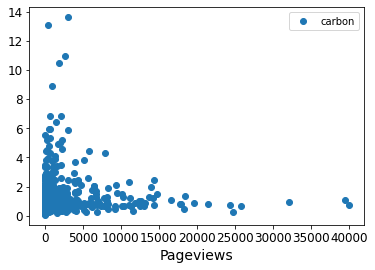

In [23]:
 reduced.plot(x='Pageviews', y='carbon', style='o')

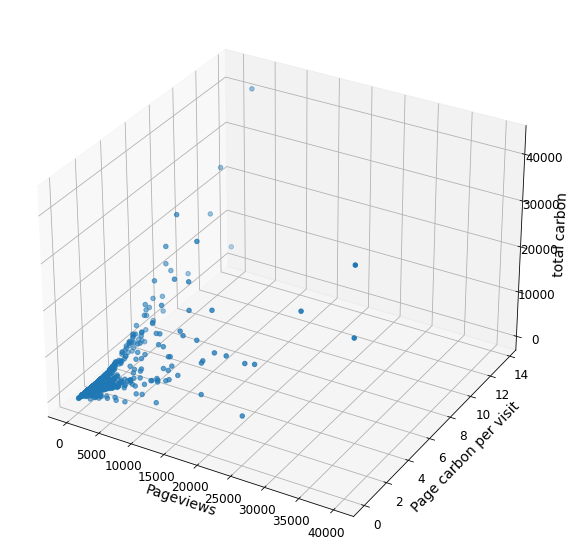

In [24]:
X=reduced['Pageviews']
Y=reduced['carbon']
Z=reduced['tot_carbon']



fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X,Y,Z) # plot the point (2,3,4) on the figure
ax.set_xlabel("Pageviews")

ax.set_ylabel("Page carbon per visit")

ax.set_zlabel("total carbon")

plt.show()

In [25]:
reduced.carbon.value_counts()

0.66    313
0.79    209
0.67    179
0.68    168
0.82    146
       ... 
1.37      1
4.48      1
3.02      1
3.36      1
2.94      1
Name: carbon, Length: 246, dtype: int64

## K-means

In [27]:
num_data = ['carbon','Pageviews','tot_carbon']
col_names = ['carbon','Pageviews','tot_carbon','page']
features = reduced[col_names]
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OrdinalEncoder #We use the ordinal encoder for the labels as there are only two values and it will work for what we need. 
ordinal_encoder = OrdinalEncoder()
num_pipeline = Pipeline([('std_scaler', StandardScaler()) # Scaling numerical values
 ])




full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), ['carbon','Pageviews','tot_carbon'])], #Scaling the data with Standard scalar
         remainder='passthrough' # leave categorical data  
    )

data_prepared = full_pipeline.fit_transform(features)

data = pd.DataFrame(data_prepared, columns = features.columns)



In [28]:
data.head()

,carbon,Pageviews,tot_carbon,page
0,-0.238867,17.31044,10.218539,https://www.jisc.ac.uk/about
1,-0.267039,0.526046,0.204598,https://www.jisc.ac.uk/about/certification
2,-0.281125,1.948213,1.01015,https://www.jisc.ac.uk/about/corporate
3,8.339491,0.605496,4.890557,https://www.jisc.ac.uk/about/corporate/annual-...
4,0.000595,1.172686,0.811547,https://www.jisc.ac.uk/about/corporate/board


# Carbon emissions per visit - Total annual carbon

### Calculating optimum number of clusters

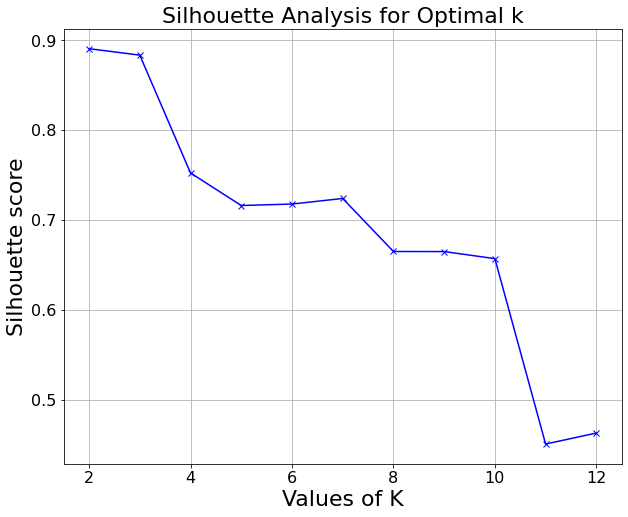

In [29]:

X = data[['carbon','tot_carbon']]

range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12]  # deciding on range of clusters to ckeck
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_#
    
 
 # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))

fig = plt.figure(figsize=(10,8))  # ploting silhouette scores
plt.grid()
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K',fontsize=22) 
plt.ylabel('Silhouette score',fontsize=22) 
plt.title('Silhouette Analysis for Optimal k',fontsize=22)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)


plt.grid()
fig.savefig('silhouette')
plt.grid()
plt.show()







<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

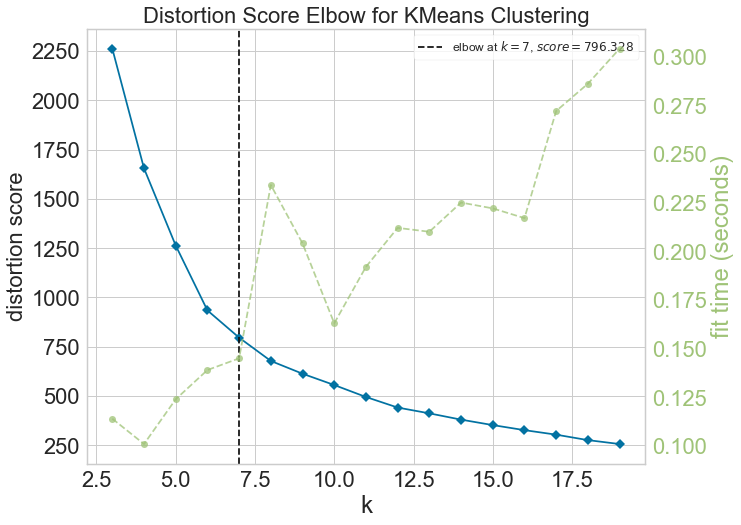

In [30]:
# plotting distortion score

from yellowbrick.cluster import KElbowVisualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3, 20), fontsize =22)
fig = plt.figure(figsize=(10,8))
plt.rc('axes', labelsize=24)
plt.rc('ytick', labelsize=22)
plt.rc('xtick', labelsize=22)
plt.rc('axes', titlesize=22)
plt.rc('legend',fontsize=22)
plt.ylabel('Distortion score',fontsize=22)

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show(outpath="elbow_method.png") # Finalize and render the figure
#plt.show()


3 [[ 0.5  0.5]
 [ 0.   7. ]
 [10.   0. ]]


C:\Users\eleni.apostolopoulou\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1148: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


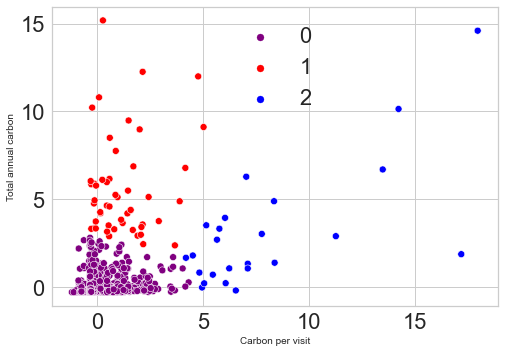

4 [[ 0.   0. ]
 [ 1.5  0. ]
 [ 0.   5. ]
 [17.   5. ]]


C:\Users\eleni.apostolopoulou\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1148: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


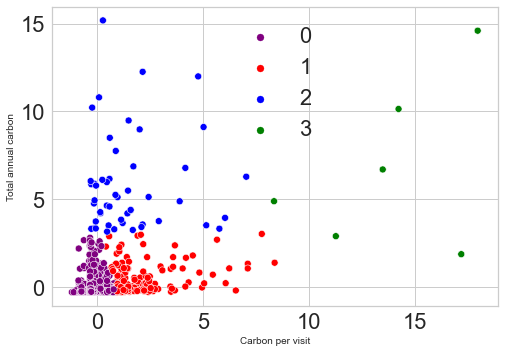

5 [[ 0  0]
 [ 6  0]
 [ 0  9]
 [ 3  0]
 [20  4]]


C:\Users\eleni.apostolopoulou\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1148: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


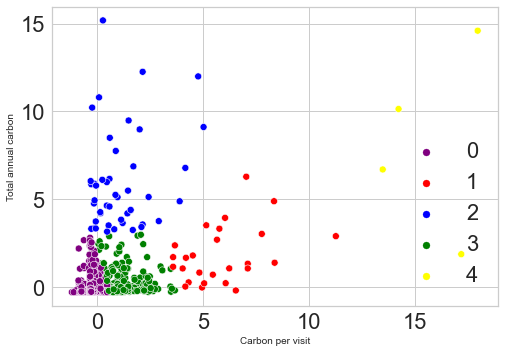

6 [[ 0.   0. ]
 [ 5.   0. ]
 [14.   2. ]
 [ 0.   2.5]
 [ 0.  10. ]
 [17.   5. ]]


C:\Users\eleni.apostolopoulou\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1148: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


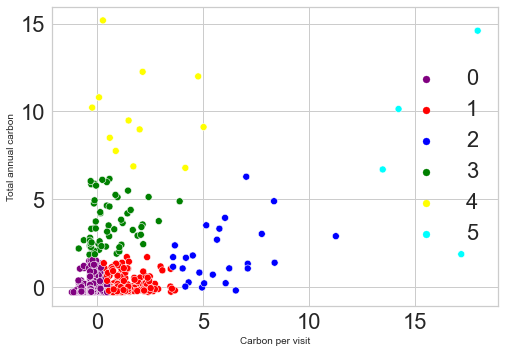

7 [[ 0.   0. ]
 [ 1.5  0. ]
 [ 5.   0. ]
 [14.   2. ]
 [ 0.   2.5]
 [ 0.  10. ]
 [17.   5. ]]


C:\Users\eleni.apostolopoulou\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1148: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


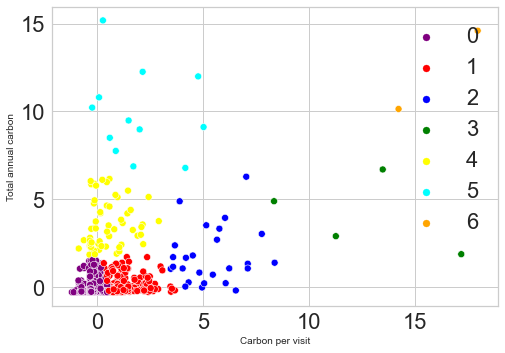

8 [[ 0.   0. ]
 [ 1.5  0. ]
 [ 5.   0. ]
 [14.   2. ]
 [ 0.   2.5]
 [ 0.   5. ]
 [ 0.  14. ]
 [17.   5. ]]


C:\Users\eleni.apostolopoulou\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1148: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


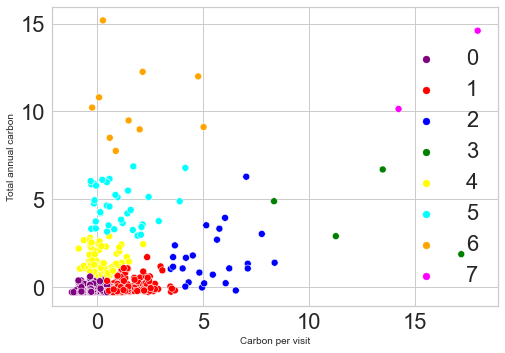

9 [[ 0.   0. ]
 [ 1.5  0. ]
 [ 5.   0. ]
 [14.   2. ]
 [ 0.   2.5]
 [ 0.   5. ]
 [ 0.  14. ]
 [15.   5. ]
 [15.  12. ]]


C:\Users\eleni.apostolopoulou\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1148: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


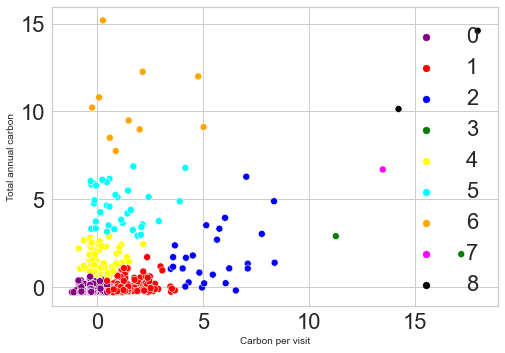

In [31]:
import seaborn as sns
X = data[['carbon','tot_carbon']]
k = (3,4,5,6,7,8,9)
centroids3 = np.asarray([[0.5,0.5],[0,7],[10,0]])
centroids4 = np.asarray([[0,0],[1.5,0],[0,5],[17,5]])
centroids5 = np.asarray([[0,0],[6,0],[0,9],[3,0],[20,4]])
centroids6 =np.asarray([[0,0],[5,0],[14,2],[0,2.5],[0,10],[17,5]])
centroids7 = np.asarray([[0,0],[1.5,0],[5,0],[14,2],[0,2.5],[0,10],[17,5]])
centroids8= np.asarray([[0,0],[1.5,0],[5,0],[14,2],[0,2.5],[0,5],[0,14],[17,5]])
centroids9= np.asarray([[0,0],[1.5,0],[5,0],[14,2],[0,2.5],[0,5],[0,14],[15,5],[15,12]])
centroids = (centroids3,centroids4,centroids5,centroids6,centroids7,centroids8,centroids9)
colors = {0:'purple', 1: 'red', 2: 'blue', 3: 'green', 4: 'yellow', 5: 'cyan', 6: 'orange', 7: 'magenta',  8: 'black'}

for i,j in zip(k,centroids):

# Define the number of clusters.
    kmeans = KMeans(n_clusters=i,init=j, n_init=10, random_state=2) 
    print(i,j)# Define the cluster algorithm.
    y_pred = kmeans.fit_predict(X)                       # Tell the kmeans algorithm to predict the clusters.
    #plt.scatter(data['carbon'], data['tot_carbon'], c= y_pred)
    g =sns.scatterplot(x=data['carbon'], y=data['tot_carbon'], hue=y_pred, palette=colors, legend='full')
    g.set_xlabel("Carbon per visit", fontsize = 10)
    g.set_ylabel("Total annual carbon", fontsize = 10)


#plt.plot(reduced['unique_pageviews'], 1.76*reduced['unique_pageviews'])
    #plt.xlabel("carbon emissions per visit-"+str(i)+"clusters", fontsize=14)
    #plt.ylabel("tot annual carbon", fontsize=14)
    #plt.legend(loc="upper left", fontsize=12)                            # Add legend in upper left hand corner.

    plt.show()

# Carbon emissions per visit - Total annual carbon

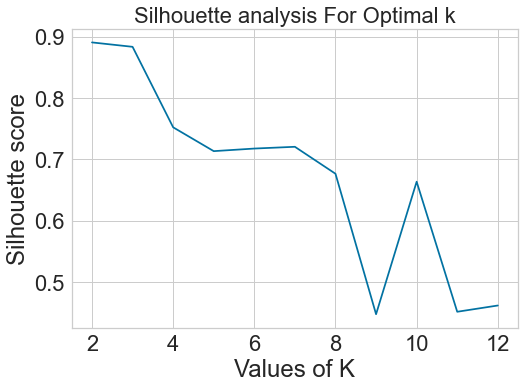

In [32]:
X = data[['carbon','tot_carbon']]

range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()




In [62]:
k = 7

centroids = np.asarray([[0,0],[1.5,0],[5,0],[14,2],[0,2.5],[0,10],[17,5]])



# Define the number of clusters.
kmeans = KMeans(n_clusters=k,init=centroids, n_init=10, random_state=2)       # Define the cluster algorithm.
y_pred = kmeans.fit_predict(X)                       # Tell the kmeans algorithm to predict the clusters.

Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.


In [34]:
np.set_printoptions(suppress=True)
kmeans.cluster_centers_ # showing generated centroids

array([[-0.22921877, -0.17016869],
       [ 1.22191133,  0.06341743],
       [ 5.32238385,  1.74799257],
       [12.5582401 ,  4.09134403],
       [ 0.5433904 ,  3.58905743],
       [ 1.90337496,  9.82808476],
       [16.07973349, 12.3674721 ]])

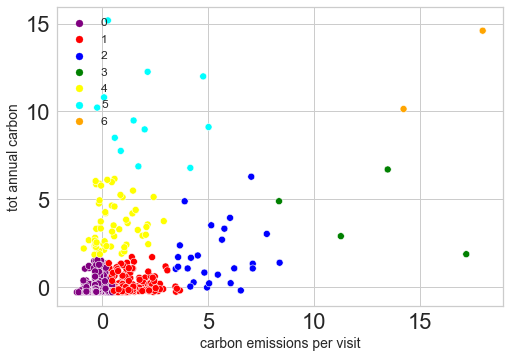

In [35]:
colors = {0:'purple', 1: 'red', 2: 'blue', 3: 'green', 4: 'yellow', 5: 'cyan', 6: 'orange', 7: 'magenta',  8: 'black'}
g =sns.scatterplot(x=data['carbon'], y=data['tot_carbon'], hue=y_pred, palette=colors, legend='full')
#plt.scatter(data['carbon'], data['tot_carbon'], c = y_pred)
#plt.plot(reduced['unique_pageviews'], 1.76*reduced['unique_pageviews'])
plt.xlabel("carbon emissions per visit", fontsize=14)
plt.ylabel("tot annual carbon", fontsize=14)
plt.legend(loc="upper left", fontsize=12)                            # Add legend in upper left hand corner.

plt.show()

# Shap analysis

In [1]:
import shap

c:\Users\Eleni.Apostolopoulo\Miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize

X = reduced[['carbon','tot_carbon']]
kmeans = KMeans(n_clusters=k,init=centroids, n_init=10, random_state=2)       # Define the cluster algorithm.
#y = kmeans.fit(X)  
y = kmeans.fit(X).labels_
#kmeanModel = KMeans(n_clusters=3)
#y=kmeanModel.fit(scaled_wine_df).labels_
#y = label_binarize(y, classes=[0,1,2,3,4,5,6])
clf=RandomForestClassifier()
clf.fit(X,y)               # classifies pages into the clusters 
explainer= shap.TreeExplainer(clf) 
explainer.expected_value
shap_values = explainer(X)

Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.


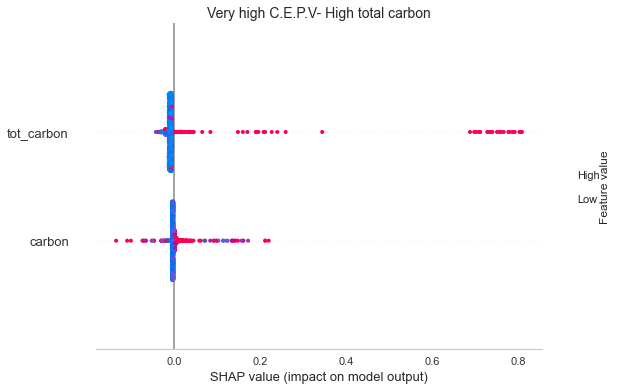

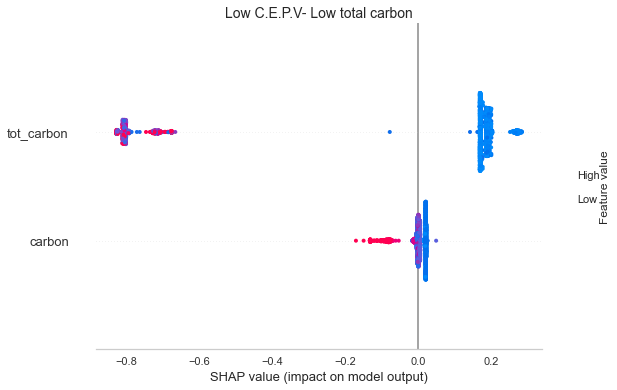

In [47]:
plt.grid(False)
plt.title("Very high C.E.P.V- High total carbon")
plt.grid(False)
shap.summary_plot(shap_values[:,:,6], features = X,plot_size=[10,6])  # SHAP summary plot for cluster 6




plt.title("Low C.E.P.V- Low total carbon")
plt.grid(False)
plt.rc('ytick', labelsize=22)
plt.rc('xtick', labelsize=22)
shap.summary_plot(shap_values[:,:,0], features = X,plot_size=[10,6]) # SHAP summary plot for cluster 0


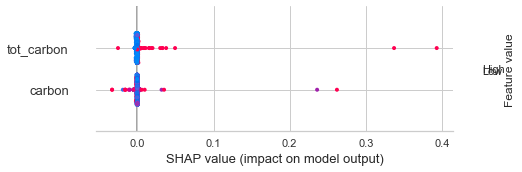

In [48]:
shap.summary_plot(shap_values[:,:,3], features = X)

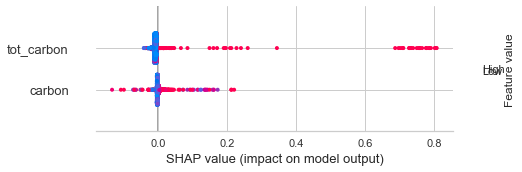

In [49]:
shap.summary_plot(shap_values[:,:,6], features = X)

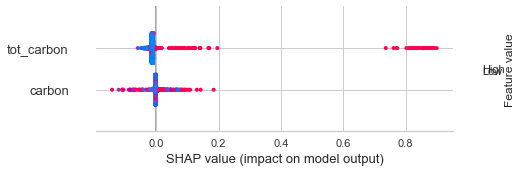

In [50]:
shap.summary_plot(shap_values[:,:,5], features = X)

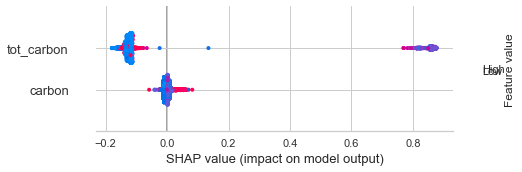

In [51]:
shap.summary_plot(shap_values[:,:,1], features = X)

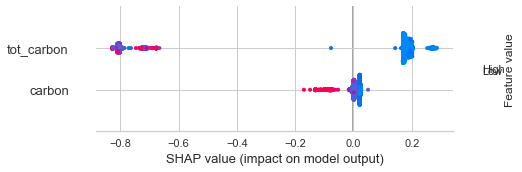

In [52]:
shap.summary_plot(shap_values[:,:,0], features = X)